In [7]:
import pandas as pd
import os
import sys
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
import math
# %matplotlib notebook
%matplotlib inline
# -------------------------------------------------------------------------------

df3 = pd.read_csv("../inversion_low_freq/Convergence3.csv",dtype=float)
df6 = pd.read_csv("../inversion_low_freq/Convergence6.csv",dtype=float)
df12 = pd.read_csv("../inversion_low_freq/Convergence12.csv",dtype=float)

df6['current_iterate']+=df3['current_iterate'].iloc[-1]
df12['current_iterate']+=df6['current_iterate'].iloc[-1]

df_low_freq=pd.concat([df3, df6, df12], ignore_index=True)
df_low_freq['cumulative_function_solves'] = df_low_freq['function_solves'].cumsum()

df3 = pd.read_csv("../inversion_all_freq/Convergence3.csv",dtype=float)
df6 = pd.read_csv("../inversion_all_freq/Convergence6.csv",dtype=float)
df12 = pd.read_csv("../inversion_all_freq/Convergence12.csv",dtype=float)

df6['current_iterate']+=df3['current_iterate'].iloc[-1]
df12['current_iterate']+=df6['current_iterate'].iloc[-1]

df_all_freq=pd.concat([df3, df6, df12], ignore_index=True)
df_all_freq['cumulative_function_solves'] = df_all_freq['function_solves'].cumsum()

df3 = pd.read_csv("../inversion_normal/Convergence3.csv",dtype=float)
df6 = pd.read_csv("../inversion_normal/Convergence6.csv",dtype=float)
df12 = pd.read_csv("../inversion_normal/Convergence12.csv",dtype=float)

df6['current_iterate']+=df3['current_iterate'].iloc[-1]
df12['current_iterate']+=df6['current_iterate'].iloc[-1]

df_normal=pd.concat([df3, df6, df12], ignore_index=True)
df_normal['cumulative_function_solves'] = df_normal['function_solves'].cumsum()

print("df Headers: ", df_low_freq.columns.values)



df Headers:  ['current_iterate' 'function_solves' 'function_value' 'gnorm'
 'gradient_iterate' 'hessian_iterate' 'objective_iterate'
 'cumulative_function_solves']


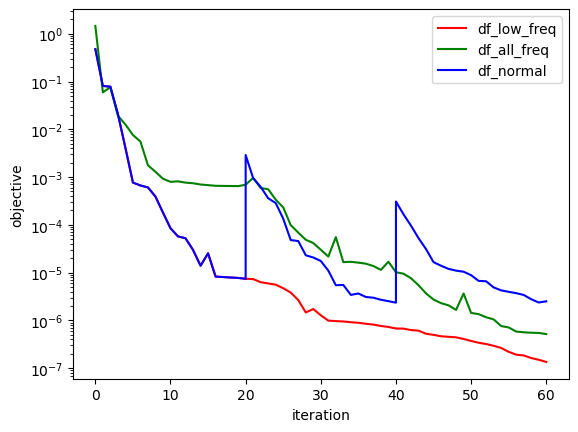

In [9]:
#------ offset 1
fig1 = plt.figure()
plt.plot(
    df_low_freq["current_iterate"],
    df_low_freq["function_value"],
    "-r",
    label="df_low_freq",
)
plt.plot(
    df_all_freq["current_iterate"],
    df_all_freq["function_value"],
    "-g",
    label="df_all_freq",
)
plt.plot(
    df_normal["current_iterate"],
    df_normal["function_value"],
    "-b",
    label="df_normal",
)
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('objective')
plt.legend()
# plt.xlim(6.e7,6.2e7)
# plt.ion()
plt.show()